# Kodluyoruz - Carbon Veri Bilimi Bootcamp'i 1. Hafta Ödevi  

### Ödev Tanımı

Bu hafta ödev olarak ise sizden bir "Veri Seti Okuma/Oluşturma Class'ı" yazmanızı istiyoruz. Bunu yaparken hem Python bilgilerinizi pekiştirmenizi hem de bu hafta işlediklerimizi kullanmanızı bekliyor olacağız. 

Yapmanız gerekenler:
- "DataOperations" adlı bir class oluşturmanız.
- Bu class'ta şunların olmasını bekliyoruz:
  - Eğer class oluşturulurken bir numpy array'i verilirse bunu pandas dataframe'ine çevirerek kaydetmesi,
  - Eğer bir path verilirse, ve bu path'de csv ya da json dosyası varsa bunu veriyi bir pandas dataframe'ine kaydetmesi,
  - Eğer direkt olarak pandas dataframe'i verilirse de herhangi bir değişiklik yapmadan kaydetmesi,
  - Eğer herhangi bir değer verilmeden class oluşturulursa, rastgele bir veri seti oluşturmanız gerekmekte.
  - Class oluşturulduktan sonra ise bu veri üzerine analiz çıkartabilecek fonksiyonlar yazmanızı bekliyoruz:
    - Her sütundaki veri sayısı ve tipi, eğer sayısal veriler varsa standart sapma, ortalama gibi istatistiksel değerlerini veren bir fonksiyon,
    - Sayısal veriler içeren sütunların görselleştirilmesi.
- Tüm fonksiyonlara ve ana class içeriğine `Docstring`lerini yazmaya, isimlendirmeleri Python kurallarına göre yapmaya dikkat etmeye çalışın lütfen.

## Gerekli Kütüphanelerin Import Edilmesi 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## DataOperations Sınıfının Oluşturulması

In [2]:
DATA_COUNT = 20

In [3]:
class DataOperations:
    
    # --------- 0 --------- 
    # Constructor tanımlama
    def __init__(self, args=None):
        
        # --------- 1 --------- 
        # numpy array'i verilirse, 
        # pandas dataframe'ine çevirerek kaydetme
        
        if type(args) is np.ndarray: 
            self.data = pd.DataFrame(args)
        
        # --------- 2 --------- 
        # Herhangi bir dosya yolu verilirse, 
        # dosya içindeki verileri dataframe'e kaydetme
        
        elif type(args) is str: 
            try:
                if args.endswith('.csv'):
                    self.data = pd.read_csv(args)

                elif args.endswith('.json'):
                    self.data = pd.read_json(args)

                elif args.endswith('.jsonl'):
                    self.data = pd.read_json(args, lines=True)
                    
            except:
                print("Dosya yolu okunamadı!/Böyle bir dosya yok!")
                
        # --------- 3 --------- 
        # pandas dataframe'i verilirse, 
        # dataframe'i herhangi bir değişiklik yapmadan kaydetme   
        
        elif type(args) is pd.core.frame.DataFrame: 
            self.data = args
            
        # --------- 4 --------- 
        # Class oluşturulurken değer verilmediyse, 
        # rastgele bir veri seti oluşturma
        
        else:    
            data_array = np.random.randint(0, 100, size=DATA_COUNT)
            data_array = data_array.reshape(4,5)
            self.data = pd.DataFrame(data_array)
            
    # --------- 5 ---------
    # Okunan/Oluşturulan veri setinin 
    # kullanıcıya döndürülmesi
    
    def display_data(self):
        try:
            return self.data
        except:
            return print("Veri seti boş!")
        
    # --------- 6 ---------
    # Okunan/Oluşturulan veri setinin
    # info ve describe bilgilerinin 
    # kullanıcıya döndürülmesi    
   
    def display_analysis(self, kind=None):
        
        try:
            if kind == "info" or kind == "i" or kind == None:
                return self.data.info()
            elif kind == "describe" or kind == "d":
                return self.data.describe().T
        except:
            print("Veri seti bulunamadı!")
            
    # --------- 7 ---------
    # Okunan/Oluşturulan veri setinin
    # görselleştirilmesi
    
    def visualization(self, kind= None, x=None, y=None, z=None, col= None, row=None, title=None):
        try:
            plt.figure(figsize = (10,5))
            suptitle(title, size=20)
            
            if kind==None:
                return sns.pairplot(self.data, hue=z);
            
            elif kind == "barplot":
                return sns.barplot(x = x, y = y, hue = z , data = self.data);
            
            elif kind == "boxplot":
                return sns.boxplot(x = x, y = y, hue = z, data=self.data);
                
            elif kind == "lmplot":
                return sns.lmplot(x = x, y = y, hue = z,
                                       col=col, row=row, data=self.data);
            
            elif kind == "scatterplot":
                return sns.scatterplot(x = x, y = y, hue = z, style=z, data=self.data);
            
            elif kind == "lineplot":
                return sns.lineplot(x = x, y = y, hue = z, style = x, markers=True, dashes=False ,data=self.data);

            
            elif kind == "corr":
                return sns.heatmap(self.data.corr(), cmap="magma_r", annot=True);
            
            else:
                return
            
        except:
            print("Bir hata oluştu!")

## Veri Setlerinin Okunması/Oluşturulması

### 1. Numpy Array

In [4]:
# Verilen boyut bilgisine göre bir numpy dizisi oluşturma
def create_numpy_array(dimension = 1):
    array = np.random.randint(0, 100, size=DATA_COUNT)
    numpy_array =  np.array(array)
    
    if dimension == 2:
        numpy_array = numpy_array.reshape(4,5)  
        
    return numpy_array    


#### Tek Boyutlu Array

In [5]:
numpyObjectOneDimension = DataOperations(create_numpy_array())
numpyObjectOneDimension.display_data().head()

,0
0,43
1,93
2,28
3,51
4,52


In [6]:
numpyObjectOneDimension.display_analysis()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       20 non-null     int32
dtypes: int32(1)
memory usage: 208.0 bytes


In [7]:
numpyObjectOneDimension.display_analysis("describe")

,count,mean,std,min,25%,50%,75%,max
0,20.0,59.5,25.640223,18.0,42.5,57.0,84.25,94.0


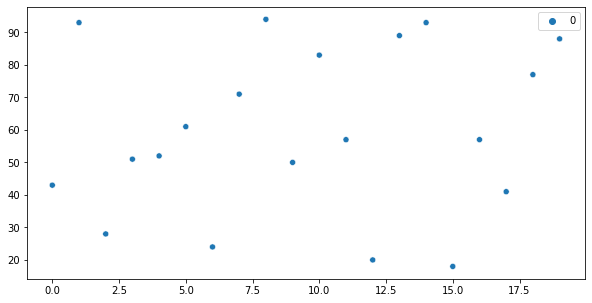

In [8]:
numpyObjectOneDimension.visualization("scatterplot");

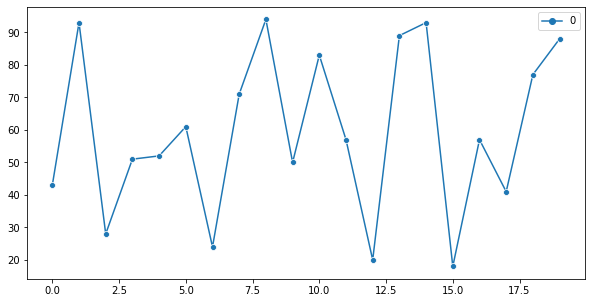

In [9]:
numpyObjectOneDimension.visualization("lineplot");

#### İki Boyutlu Array

In [10]:
numpyObjectTwoDimensions = DataOperations(create_numpy_array(2))
numpyObjectTwoDimensions.display_data()

,0,1,2,3,4
0,58,89,37,3,3
1,34,30,62,69,37
2,70,6,82,75,48
3,75,93,6,81,14


In [11]:
numpyObjectTwoDimensions.display_analysis()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       4 non-null      int32
 1   1       4 non-null      int32
 2   2       4 non-null      int32
 3   3       4 non-null      int32
 4   4       4 non-null      int32
dtypes: int32(5)
memory usage: 208.0 bytes


In [12]:
numpyObjectTwoDimensions.display_analysis("describe")

,count,mean,std,min,25%,50%,75%,max
0,4.0,59.25,18.282505,34.0,52.00,64.0,71.25,75.0
1,4.0,54.50,43.301270,6.0,24.00,59.5,90.00,93.0
2,4.0,46.75,32.816408,6.0,29.25,49.5,67.00,82.0
3,4.0,57.00,36.331804,3.0,52.50,72.0,76.50,81.0
4,4.0,25.50,20.631691,3.0,11.25,25.5,39.75,48.0


<Figure size 720x360 with 0 Axes>

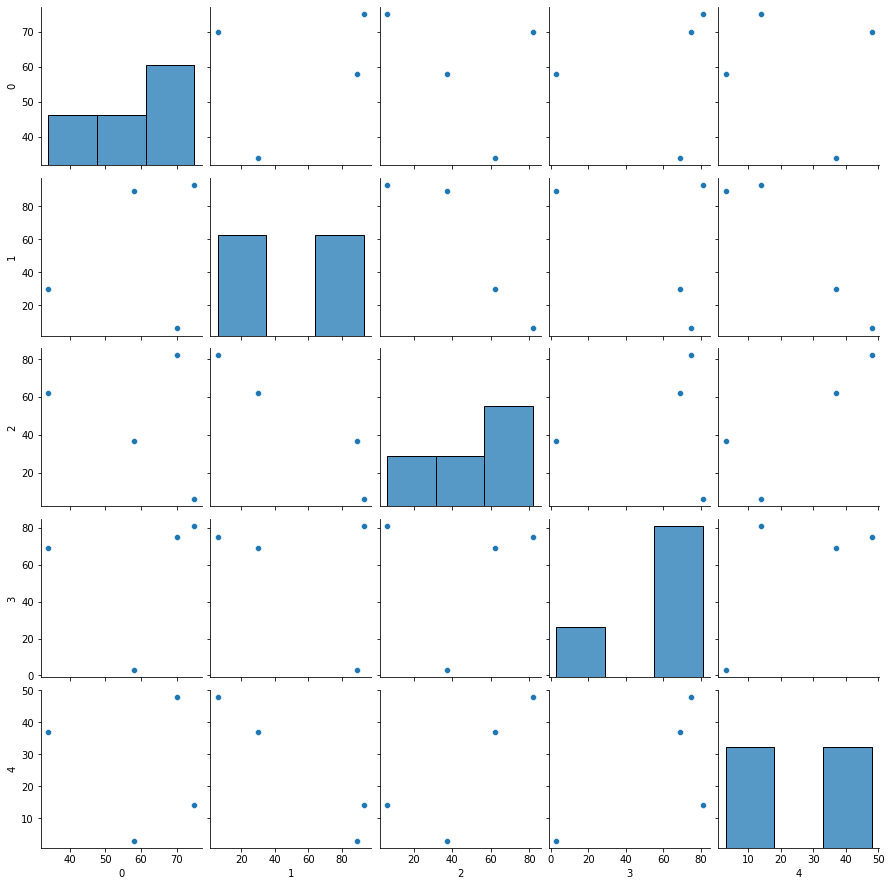

In [13]:
numpyObjectTwoDimensions.visualization();

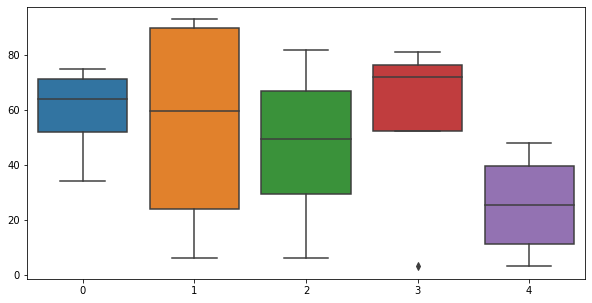

In [14]:
numpyObjectTwoDimensions.visualization("boxplot");

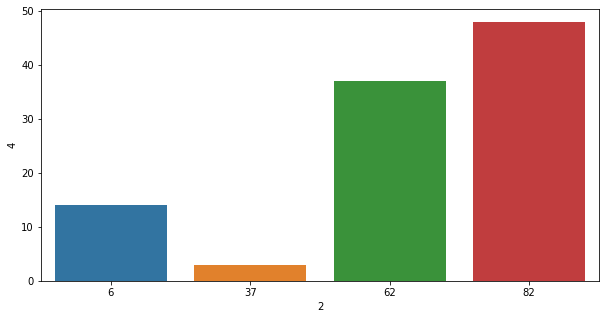

In [15]:
numpyObjectTwoDimensions.visualization("barplot",2,4);

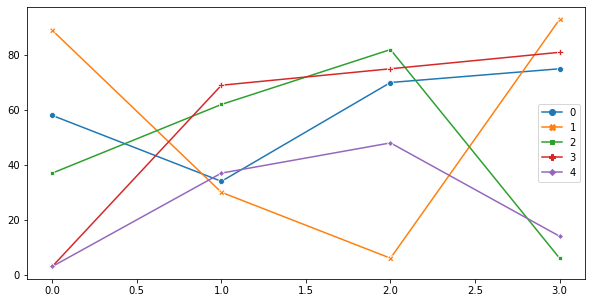

In [16]:
numpyObjectTwoDimensions.visualization("lineplot");

### 2. Dosyadan Okuma

#### Dosya Bulunamazsa/Yoksa

In [17]:
path = "boyle_bir_dosya_yok.csv"
strObjectwithNoFile = DataOperations(path)
strObjectwithNoFile.display_data()

Dosya yolu okunamadı!/Böyle bir dosya yok!
Veri seti boş!


In [18]:
strObjectwithNoFile.display_analysis("i")

Veri seti bulunamadı!


In [19]:
strObjectwithNoFile.visualization("barplot")

Bir hata oluştu!


<Figure size 720x360 with 0 Axes>

#### Dosya Okunabilirse

In [20]:
path= "datasets/trial_dataset.json"
strObjectwithActualPath = DataOperations(path)
strObjectwithActualPath.display_data().head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [21]:
strObjectwithActualPath.display_analysis("i")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [22]:
strObjectwithActualPath.display_analysis("d")

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


<Figure size 720x360 with 0 Axes>

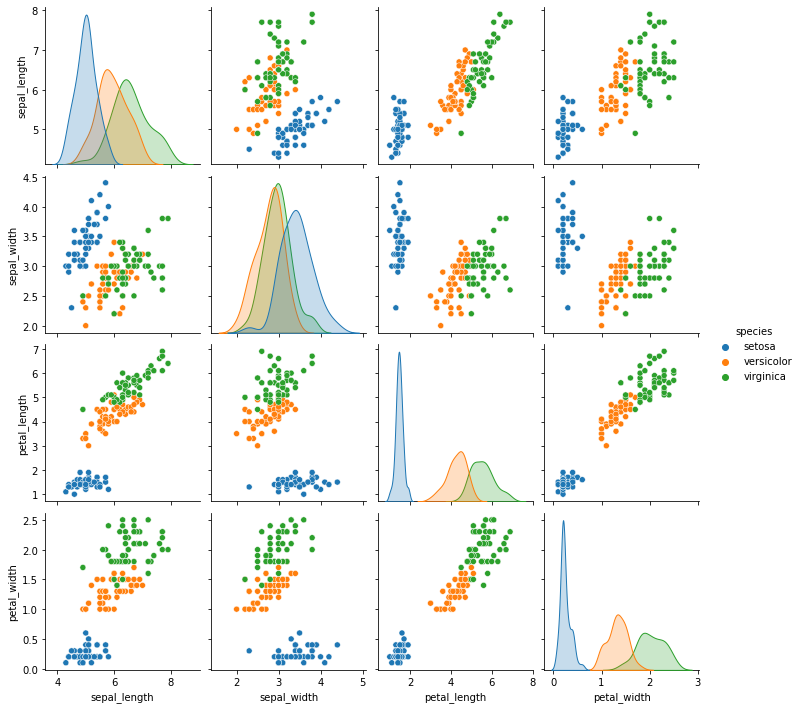

In [23]:
strObjectwithActualPath.visualization(z="species");

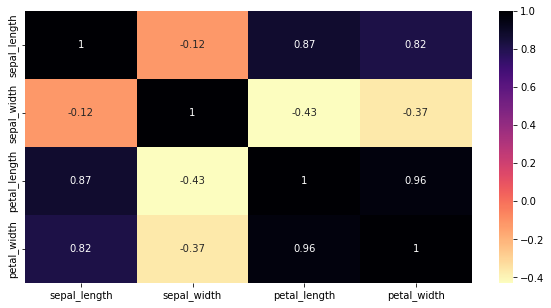

In [24]:
strObjectwithActualPath.visualization("corr");

<Figure size 720x360 with 0 Axes>

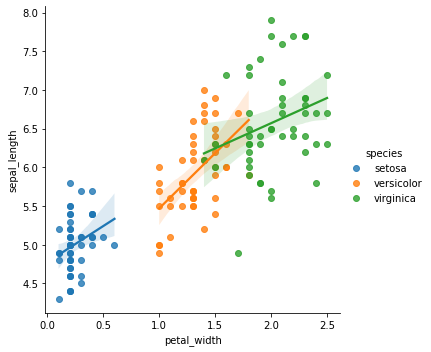

In [25]:
strObjectwithActualPath.visualization("lmplot","petal_width","sepal_length","species");

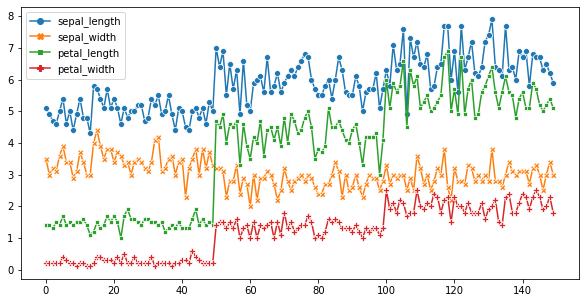

In [26]:
strObjectwithActualPath.visualization("lineplot");

### 3. Pandas Object

In [27]:
dataset = sns.load_dataset("tips")
pandasObject = DataOperations(dataset)
pandasObject.display_data().head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [28]:
pandasObject.display_analysis("info")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [29]:
pandasObject.display_analysis("d")

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


<Figure size 720x360 with 0 Axes>

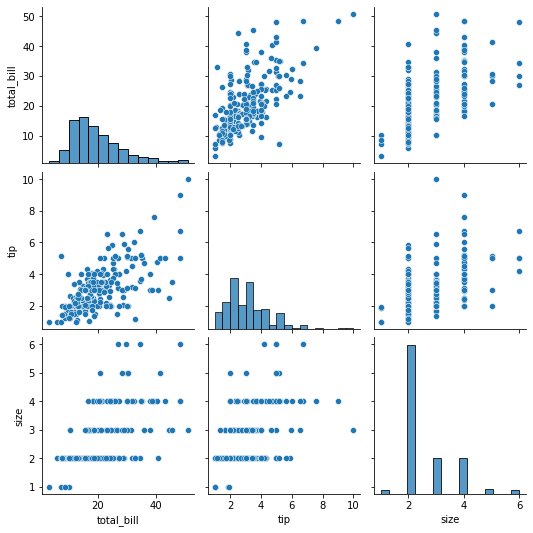

In [30]:
pandasObject.visualization();

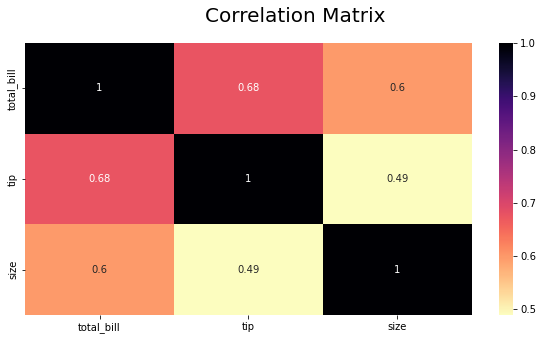

In [31]:
pandasObject.visualization("corr", title="Correlation Matrix");

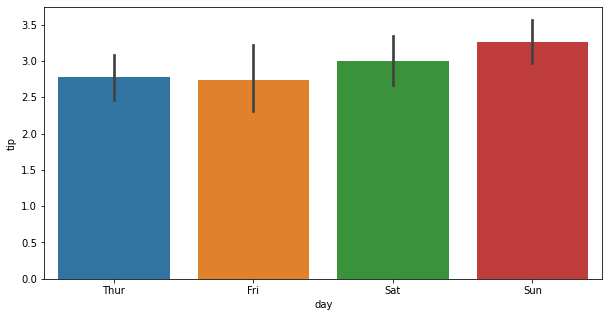

In [32]:
pandasObject.visualization("barplot","day","tip");

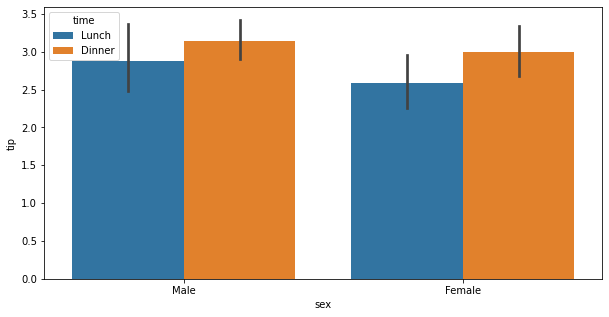

In [33]:
pandasObject.visualization("barplot", "sex", "tip", "time");

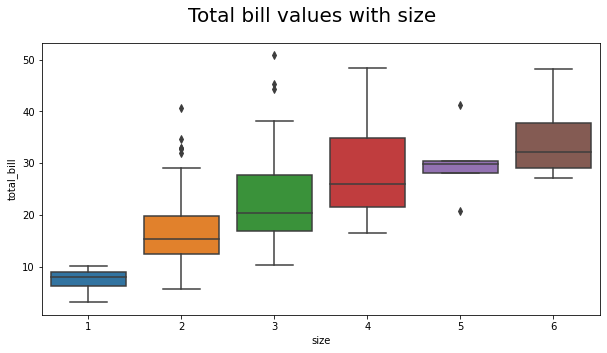

In [34]:
pandasObject.visualization("boxplot","size","total_bill",title="Total bill values with size");

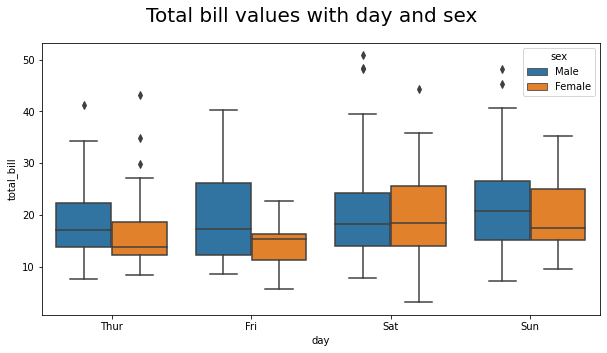

In [35]:
pandasObject.visualization("boxplot","day","total_bill","sex", title="Total bill values with day and sex");

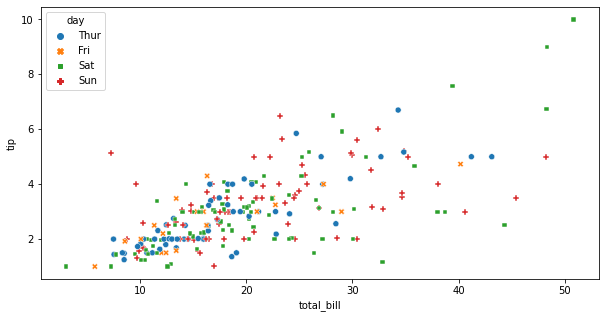

In [36]:
pandasObject.visualization("scatterplot","total_bill","tip","day");

<Figure size 720x360 with 0 Axes>

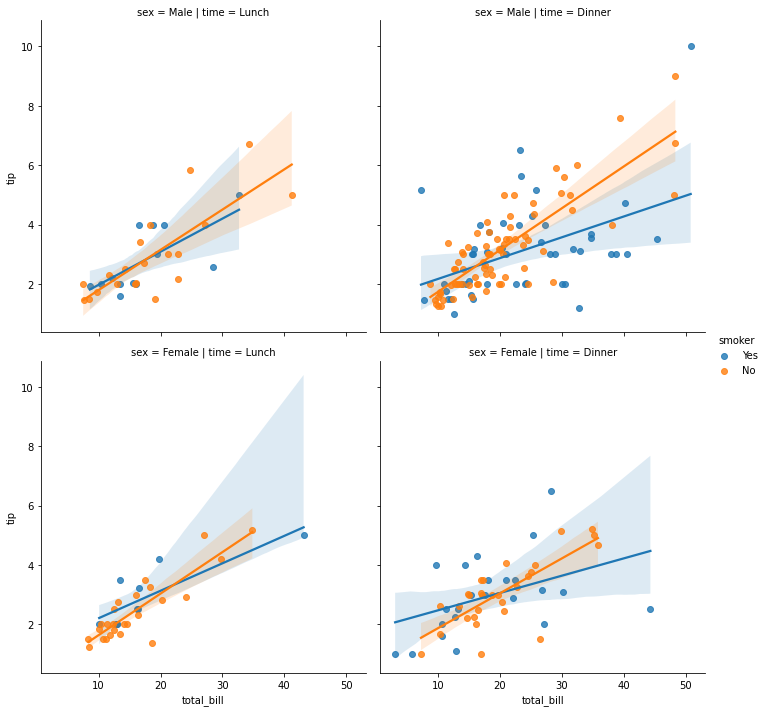

In [37]:
pandasObject.visualization("lmplot",x="total_bill", y="tip", z="smoker",col="time",row="sex");

### 4. Object Without Parameter

In [38]:
objectWithoutParameter = DataOperations()
objectWithoutParameter.display_data().head()

,0,1,2,3,4
0,14,37,82,56,83
1,60,48,17,76,90
2,75,23,55,48,49
3,74,3,11,12,33


In [39]:
objectWithoutParameter.display_analysis("info")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       4 non-null      int32
 1   1       4 non-null      int32
 2   2       4 non-null      int32
 3   3       4 non-null      int32
 4   4       4 non-null      int32
dtypes: int32(5)
memory usage: 208.0 bytes


In [40]:
objectWithoutParameter.display_analysis("describe")

,count,mean,std,min,25%,50%,75%,max
0,4.0,55.75,28.663275,14.0,48.5,67.0,74.25,75.0
1,4.0,27.75,19.414342,3.0,18.0,30.0,39.75,48.0
2,4.0,41.25,33.430276,11.0,15.5,36.0,61.75,82.0
3,4.0,48.00,26.733250,12.0,39.0,52.0,61.00,76.0
4,4.0,63.75,27.219784,33.0,45.0,66.0,84.75,90.0


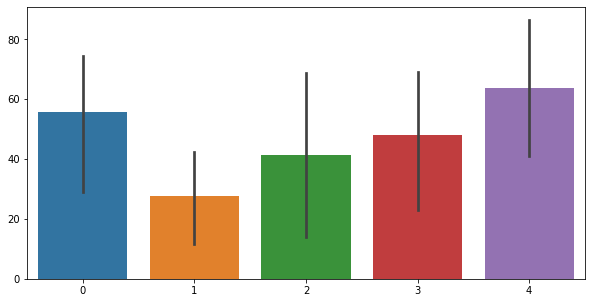

In [41]:
objectWithoutParameter.visualization("barplot");

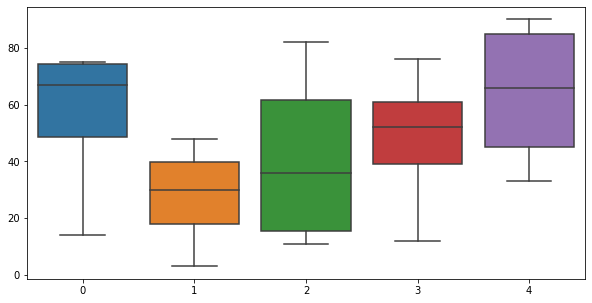

In [42]:
objectWithoutParameter.visualization("boxplot");

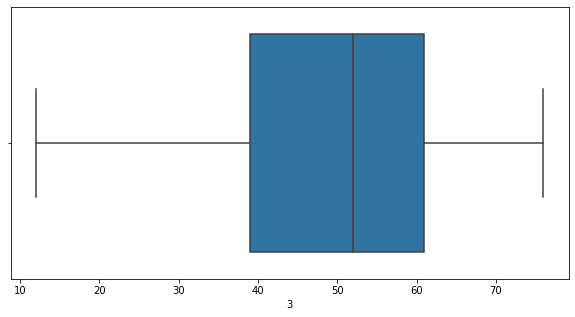

In [43]:
objectWithoutParameter.visualization("boxplot",3);

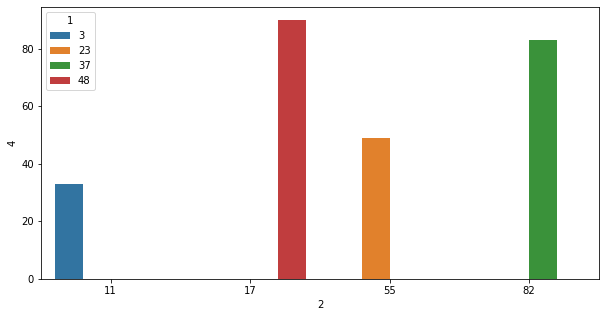

In [44]:
objectWithoutParameter.visualization("barplot",2,4,1);

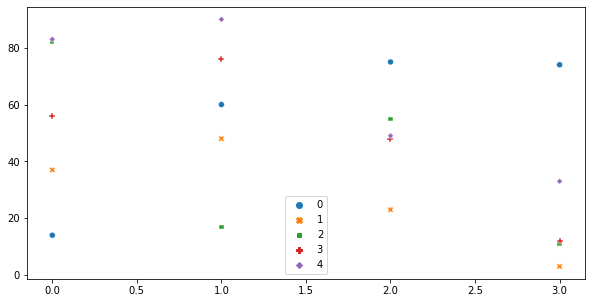

In [45]:
objectWithoutParameter.visualization("scatterplot");